# Machine Learning Assignment - 2

## Part - II: Programming

### by

<b>Mohammed Ilyas Habeeb</b>- <i>mih278@nyu.edu<i> <br><b>Faiyaz Sundrani</b>- <i>fs1459@nyu.edu<i>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import math

# Loading the Data

In [2]:
#Loading the Dataset

data_train = pd.read_csv('auto_train.csv')
data_test = pd.read_csv('auto_test.csv')

data_train.head()

,displacement,horsepower,mpg
0,307.0,130,18.0
1,350.0,165,15.0
2,318.0,150,18.0
3,304.0,150,16.0
4,302.0,140,17.0


## Linear Regression

1. Plot the data in the training set (with displacement on the horizontal axis, and mpg on the vertical axis).

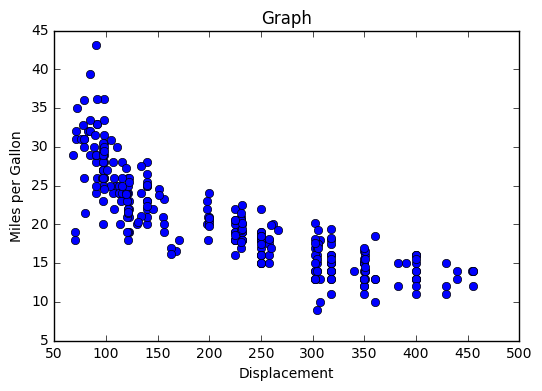

In [3]:
x = data_train['displacement']
y = data_train['mpg']
plt.plot(x, y, 'ro', color = 'b')
plt.xlabel('Displacement')
plt.ylabel('Miles per Gallon')
plt.title('Graph')
plt.show()

2.Using simple linear regression, train a linear function to predict mpg based
on displacement only, using the training data.

In [4]:
def squared_Error_Function(predicted_value, actual_value):
    '''
    i/p:
    predicted_value -> a list
    actual_value -> a list
    o/p:
    squared_error -> a float
    '''
    diff = 0
    for i, j in zip(predicted_value, actual_value):
        diff += (i - j)**2
    error_value = (1/2)* diff #(1/(2*len(predicted_value)))* diff
    #error_value = (1/(2*len(predicted_value)))* diff
    
    return error_value

In [5]:
#Modeling a Linear Regression with one variable
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

#Taking the attribute and the output for training from data_train
X_train = data_train['displacement'].values.reshape(-1, 1) #Reshaping as we have only one attribute
y_train = data_train['mpg'] #.values.reshape(-1, 1)

#Taking the attribute and the output for testing from data_test
X_test = data_test['displacement'].values.reshape(-1, 1) #Reshaping as we have only one attribute
y_test = data_test['mpg'] #.values.reshape(-1, 1)

simple_linear_regression = linear_model.LinearRegression()

simple_linear_regression.fit(X_train, y_train)

y_pred_test = simple_linear_regression.predict(X_test)

y_pred_train = simple_linear_regression.predict(X_train)

print("Training Error: %.2f" % squared_Error_Function(y_pred_train, y_train))
print("Testing Error: %.2f" % squared_Error_Function(y_pred_test, y_test))


Training Error: 1557.33
Testing Error: 3565.76


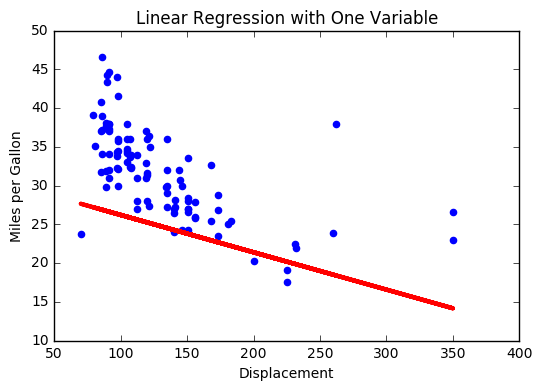

In [6]:
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, y_pred_test, color='red', linewidth=3)

# plt.xticks(())
# plt.yticks(())

plt.xlabel('Displacement')
plt.ylabel('Miles per Gallon')
plt.title('Linear Regression with One Variable')
plt.show()

3.Do polynomial regression: train polynomials of degree 2 and 4 and 6 to predict mpg based on displacement only, using the training data. Plot the 3 resulting curves and report the training and test errors in both cases (squared error Err). Do you see evidence of overfitting? Package allowed.

In [7]:
from sklearn.preprocessing import PolynomialFeatures
def polynomialRegressionCalculation(degree, X_train, y_train, X_test, y_test):
    '''
    i/p:
    degree - degree of the polynomial, an int
    X_train, y_train - attributes and output in training dataset, lists
    X_test, y_test - attributes and output in testing dataset, lists
    '''
    poly = PolynomialFeatures(degree)
    
    X_train_transformed = poly.fit_transform(X_train)
    X_test_transformed = poly.fit_transform(X_test)
    
    lg = linear_model.LinearRegression()
    
    lg.fit(X_train_transformed, y_train)
    
    #poly.fit_transform(X_train, y_train)
    
    y_pred_test = lg.predict(X_test_transformed)

    y_pred_train = lg.predict(X_train_transformed)
    
    train_error = squared_Error_Function(y_pred_train, y_train)
    test_error = squared_Error_Function(y_pred_test, y_test)
    
#     plt.scatter(X_test_transformed, y_test)
#     plt.plot(X_test_transformed, y_pred_test, color='red', linewidth=3)
#     plt.xlabel('Displacement with degree', degree)
#     plt.ylabel('Miles per Gallon')
#     plt.title('Polynomial Regression with One Variable')
#     plt.show()
    
    return y_pred_test, y_pred_train, train_error, test_error, X_test_transformed

Training Error for degree 2 is: 1296.01058799
Testing Error for degree 2 is: 3282.09475116
Training Error for degree 4 is: 1242.23889296
Testing Error for degree 4 is: 3411.64000136
Training Error for degree 6 is: 1219.71902014
Testing Error for degree 6 is: 3445.12492549


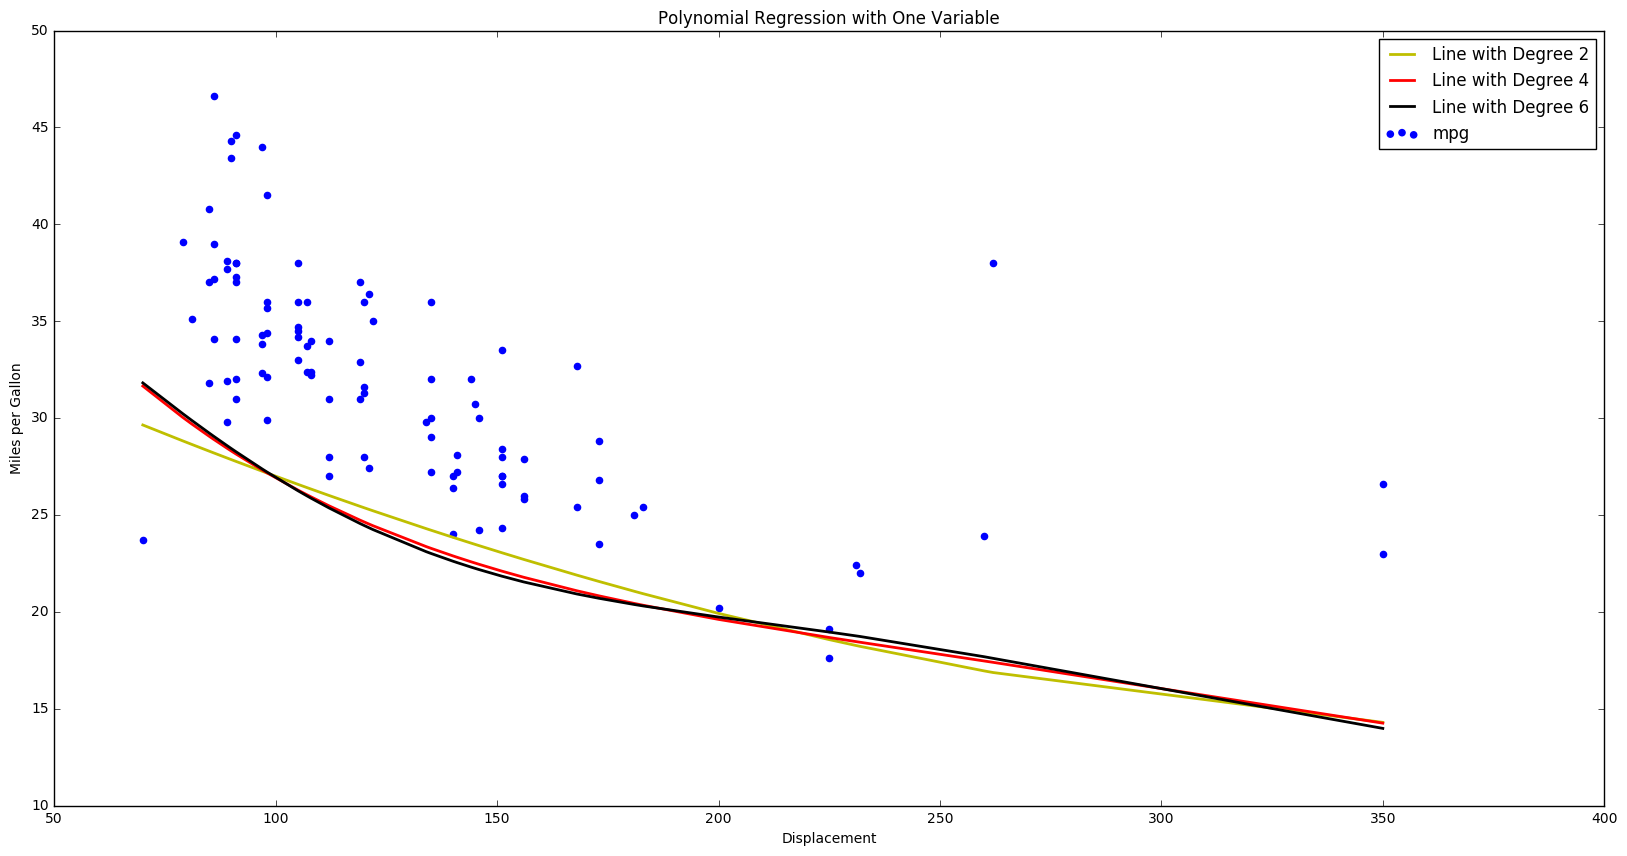

In [8]:
plt.figure(figsize=(20,10))
plt.scatter(X_test, y_test,  color='blue')
color_list = ['y', 'r', 'k']
degree_list = [2, 4, 6]
for i,j in zip(degree_list, color_list):

    testing_prediction_poly, training_prediction_poly, training_error_poly, testing_error_poly, X_test_transformed = polynomialRegressionCalculation(i, X_train, y_train, X_test, y_test)

    print("Training Error for degree", i, "is:", training_error_poly)
    print("Testing Error for degree", i, "is:", testing_error_poly)
    p=zip(*sorted(zip(*(X_test, testing_prediction_poly))))
    
    plt.plot(*p, color = j, linewidth = 2, label = 'Line with Degree ' + str(i))


plt.xlabel('Displacement')
plt.ylabel('Miles per Gallon')
plt.legend()
plt.title('Polynomial Regression with One Variable')
plt.show()

4.Do multiple linear regression: Train a linear function on the training set, using both input attributes, horsepower and displacement. Report the squared error Err on the test set only. Package allowed.

In [9]:
#Taking the attribute and the output for training from data_train
X_train_mult = data_train.drop('mpg', axis = 1)
y_train_mult = data_train['mpg']


#Taking the attribute and the output for testing from data_test
X_test_mult = data_test.drop('mpg', axis = 1)
y_test_mult = data_test['mpg']

mult_linear_regression = linear_model.LinearRegression()

mult_linear_regression.fit(X_train_mult, y_train_mult)

y_pred_mult_test = mult_linear_regression.predict(X_test_mult)


print("Testing Error: %.2f" % squared_Error_Function(y_pred_mult_test, y_test_mult))

Testing Error: 3443.39


## K Nearest Neighbors

5.Implement k Nearest Neighbor from scratch (do not use a package). Using the data in the training set, predict the output for each example in the test, for k = 1, k = 3, and k = 20 (so you will run the algorithm 3 times, once for each value of k). Report the squared error Err on the test set.

and

7.a.)Use different distance function and b.)weighted average for kNN <br><b> Distance Function <b> - <b> Manhattan Distance </b> using weighted average

###  KNN Implementation from Scratch

In [10]:
def EuclideanCalculation(x1, x2, y1, y2):
    
    res = ( (x1 - y1)**2 + (x2 - y2)**2)
    final = math.sqrt(res)
    
    return final

In [11]:
def ManhattanCalculation(x1, x2, y1, y2):
    a = x1 - y1
    b = x2 - y2
    if a < 0:
        a =(-1) * a
    
    if b < 0:
        b =(-1)*b
    
    res = a + b
    
    
    return res

In [12]:

def kNearestNeighbor(k, train_data, test_data, label):
    '''
    i/p:
    k - an int,
    train_data - the training data, a dataset
    test_data - the testing data, a dataset 
    label - the output column, a string
    o/p:
    predictions - the predictions made on the output column of test data, a list
    '''
    #Getting X (attributes) and y (output) of training data
    X_train_kNN = train_data.drop(label, axis = 1)
    y_train_kNN = train_data[label]
    
    #Getting X (attributes) and y (output) of test data
    X_test_kNN = test_data.drop(label, axis = 1)
    y_test_kNN = test_data[label]
    
    #Getting first and second attributes from X of training data
    train_first_attr = X_train_kNN[X_train_kNN.columns[0]]
    train_second_attr = X_train_kNN[X_train_kNN.columns[1]]
    
    #Getting first and second attributes from X of test data
    test_first_attr = X_test_kNN[X_test_kNN.columns[0]]
    test_second_attr = X_test_kNN[X_test_kNN.columns[1]]
    
    #A list to store predictions
    Pred_euclidean = []
    Pred_manhattan = []
    
    
    #Iterating over the test attributes
    for i, j in zip(test_first_attr, test_second_attr):
        #A list to store the Euclidean distances
        Euclidean = []
        Manhattan=[]
       
        
        #Iterating over the train attributes
        for l, m in zip(train_first_attr, train_second_attr):
            #res = ( (i - l)**2 + (j - m)**2 )
            
            #Calculating the Euclidean distance of attributes from test and training
            res = EuclideanCalculation(i, j, l, m)
            res1 = ManhattanCalculation(i,j,l,m)
            
            #Appending the distances to the list
            Euclidean.append(res)
            Manhattan.append(res1)
            
        if k == 1:
            #Getting the index of the minimum Euclidean distance
            min_distance_index_euclidean = Euclidean.index(min(Euclidean))
            min_distance_index_man = Manhattan.index(min(Manhattan))
            
            
            #Corresponding to that index, fetch the value of the y_train_kNN; this is the predicted value
            ele_to_consider_euclidean = y_train_kNN.get_value(min_distance_index_euclidean)
            ele_to_consider_manhattan = y_train_kNN.get_value(min_distance_index_man)
            
        elif k > 1:
            
            #Sorting the distance list and retrieving their corresponding indices
            intermediate_eu = sorted(range(len(Euclidean)), key = lambda ind: Euclidean[ind])
            intermediate_man = sorted(range(len(Manhattan)), key = lambda ind: Manhattan[ind])
            
            #Select only the first k indices of intermediate
            indices_to_consider_eu = intermediate_eu[0:k]
            indices_to_consider_man = intermediate_man[0:k]
            
#             calc_dist = sorted(Manhattan)
#             dist_to_consider = calc_dist[0:k]
            
            #Corresponding to the above indices, fetch the values of the y_train_kNN
            inter_list_eu = list(y_train_kNN.iloc[indices_to_consider_eu])
            inter_list_man = list(y_train_kNN.iloc[indices_to_consider_man])
            
            #Getting the avg of inter_list; this is the predicted value
            ele_to_consider_euclidean = sum(inter_list_eu) / k
            ele_to_consider_manhattan = sum(inter_list_man) / k
#             d_sum = 0
#             rd_sum = 0
#             for d, r in zip(dist_to_consider, inter_list_man):
                
#                 if d != 0: 
#                     d_sum += 1/d
#                     rd_sum += (1/d) * r
                    
            
            
            
#             if d_sum == 0 or rd_sum ==0:
#                 ele_to_consider_manhattan = 0
#             else:
#                 ele_to_consider_manhattan = rd_sum / d_sum
            
            
        
        #Appending the predicted value to Pred
        Pred_euclidean.append(ele_to_consider_euclidean)
        Pred_manhattan.append(ele_to_consider_manhattan)
    return Pred_euclidean,Pred_manhattan

In [13]:
#k values to consider
k_values = [1, 3, 20]

data_test2 = data_test.copy()
#For each value in k values
for k in k_values:
    
    #Getting the predictions
    predictions_euclidean, predictions_manhattan = kNearestNeighbor(k, data_train, data_test, 'mpg')
    
    #Calculating test error
    test_kNN_Error_eu = squared_Error_Function(predictions_euclidean, data_test['mpg'])
    test_kNN_Error_man = squared_Error_Function(predictions_manhattan, data_test['mpg'])
  
    
    #printing the test error
    print("Test Error for Euclidean Distance with K =", k, "is:", test_kNN_Error_eu)
    
    print("Test Error for Manhattan Distance with K =", k, "is:", test_kNN_Error_man)
 
    
    
    #Adding prediction lists as column 
    name = 'Predicted_Euclidean_'+str(k)
    data_test2[name] = predictions_euclidean
    
    name = 'Predicted_Manhattan_'+str(k)
    data_test2[name] = predictions_manhattan
  

Test Error for Euclidean Distance with K = 1 is: 2868.005
Test Error for Manhattan Distance with K = 1 is: 2838.83
Test Error for Euclidean Distance with K = 3 is: 2794.73
Test Error for Manhattan Distance with K = 3 is: 2676.45277778
Test Error for Euclidean Distance with K = 20 is: 2746.1914125
Test Error for Manhattan Distance with K = 20 is: 2800.3250375


6.Did k Nearest Neighbor perform better with k = 3 or with k = 20? Why do you think that happened?

<br><b> Answer :</b> K Nearest Neightbor performed better with k=20 <br>
<b>Reason:- </b> K Nearest Neighbour performs better with K= 20 <br>When the value of K is too small, it becomes a complex model, exhibiting low bias and high variance. It overfits and is susceptible to noise and outliers. <br> <br>When the value of K is too large, it becomes a simple model, exhibiting high bias and low variance. It underfits.<br> <br>In this case, the value of K=20 is neither too large nor too small. Thus, it is resilient to noise and outliers. And that is why, the test error is smaller for K=20.

### Implementing kNN with Sk-Learn

In [14]:
from sklearn.neighbors import KNeighborsRegressor

kk = [1, 3, 20]

X_train_kNN = data_train.drop('mpg', axis = 1)
y_train_kNN = data_train['mpg']

X_test_kNN = data_test.drop('mpg', axis = 1)
y_test_kNN = data_test['mpg']
    
for i in kk:
    
    neigh = KNeighborsRegressor(n_neighbors=i)

    neigh.fit(X_train_kNN, y_train_kNN)


    print("Test Error according to Sk-Learn at k = ", i, "is", squared_Error_Function(neigh.predict(X_test_kNN), y_test_kNN))


Test Error according to Sk-Learn at k =  1 is 2802.655
Test Error according to Sk-Learn at k =  3 is 2754.655
Test Error according to Sk-Learn at k =  20 is 2745.9197
